In [6]:

from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
!pip install yfinance
import yfinance as yf
yf.pdr_override()
import seaborn as sns



     |████████████████████████████████| 59 kB 3.2 MB/s eta 0:00:01
  Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)
  Using cached pytz-2022.7.1-py2.py3-none-any.whl (499 kB)
  Using cached html5lib-1.1-py2.py3-none-any.whl (112 kB)
  Using cached lxml-4.9.2-cp39-cp39-macosx_10_15_x86_64.whl (4.8 MB)
  Attempting uninstall: pytz
    Found existing installation: pytz 2021.3
    Uninstalling pytz-2021.3:
      Successfully uninstalled pytz-2021.3
  Attempting uninstall: lxml
    Found existing installation: lxml 4.8.0
    Uninstalling lxml-4.8.0:
      Successfully uninstalled lxml-4.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.


In [8]:

start = datetime.datetime(2018, 1, 1)
end = datetime.datetime(2023, 1, 1)


BTC = data.get_data_yahoo("BTC-USD", start, end)
SNP = data.get_data_yahoo("DJI", start, end)
FTSE = data.get_data_yahoo("^FTSE", start, end)
GOLD = data.get_data_yahoo("GC=F", start, end)
Eur = data.get_data_yahoo("EURUSD=X", start, end)
OIL = data.get_data_yahoo("CL", start, end)

df = data.get_data_yahoo(['BTC-USD', 'DJI', '^FTSE', 'GC=F', 'EURUSD=X', 'CL=F'], start, end)
tickers = ['BTC', 'SNP', 'FTSE', 'GOLD', 'EUR', 'OIL']

eco_price = pd.concat([BTC, SNP, FTSE, GLD, Eur, CL],axis=1,keys=tickers)
eco_price.columns.names = ['Econ Ticker','Stock Info']
eco_price.head()



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  6 of 6 completed


Econ Ticker           BTC                                            \
Stock Info           Open          High           Low         Close   
Date                                                                  
2018-01-01   14112.200195  14112.200195  13154.700195  13657.200195   
2018-01-02   13625.000000  15444.599609  13163.599609  14982.099609   
2018-01-03   14978.200195  15572.799805  14844.500000  15201.000000   
2018-01-04   15270.700195  15739.700195  14522.200195  15599.200195   
2018-01-05   15477.200195  17705.199219  15202.799805  17429.500000   

Econ Ticker                                      SNP                \
Stock Info      Adj Close       Volume          Open          High   
Date                                                                 
2018-01-01   13657.200195  10291200000           NaN           NaN   
2018-01-02   14982.099609  16846600192  24824.000000  24824.000000   
2018-01-03   15201.000000  16871900160  24922.699219  24922.699219   
2018-01-04   15599.200195  21783199744  25075.099609  25075.099609   
2018-01-05   17429.500000  23840899072  25295.900391  25295.900391   

Econ Ticker                              ...       EUR                      \
Stock Info            Low         Close  ...       Low     Close Adj Close   
Date                                     ...                                 
2018-01-01            NaN           NaN  ...  1.199904  1.200495  1.200495   
2018-01-02   24824.000000  24824.000000  ...  1.200855  1.201158  1.201158   
2018-01-03   24922.699219  24922.699219  ...  1.200495  1.206345  1.206345   
2018-01-04   25075.099609  25075.099609  ...  1.200495  1.201043  1.201043   
2018-01-05   25295.900391  25295.900391  ...  1.202154  1.206884  1.206884   

Econ Ticker               OIL                                              \
Stock Info  Volume       Open       High        Low      Close  Adj Close   
Date                                                                        
2018-01-01     0.0        NaN        NaN        NaN        NaN        NaN   
2018-01-02     0.0  75.430000  76.000000  74.839996  75.139999  66.282722   
2018-01-03     0.0  75.110001  75.720001  74.660004  74.849998  66.026917   
2018-01-04     0.0  75.050003  75.959999  74.980003  75.330002  66.450317   
2018-01-05     0.0  75.500000  75.580002  75.139999  75.419998  66.529732   

Econ Ticker             
Stock Info      Volume  
Date                    
2018-01-01         NaN  
2018-01-02   4352500.0  
2018-01-03   3310000.0  
2018-01-04   2501700.0  
2018-01-05   2852800.0  

[5 rows x 36 columns]

In [9]:
#max close price for each bank
for tick in tickers:
    (tick,eco_price[tick]['Close'].max())

returns = pd.DataFrame()

for tick in tickers:
    returns[tick+' Return'] = eco_price[tick]['Close'].pct_change()
    returns.head()

#sns.pairplot(returns[1:])

returns.idxmin()
returns.idxmax()



BTC Return    2021-02-08
SNP Return    2020-03-24
FTSE Return   2020-03-24
GOLD Return   2020-03-24
EUR Return    2022-11-07
OIL Return    2020-03-17
dtype: datetime64[ns]

In [10]:
#riskiest of stock calculation
print(returns.std())



BTC Return     0.038455
SNP Return     0.010614
FTSE Return    0.009340
GOLD Return    0.007993
EUR Return     0.003830
OIL Return     0.011308
dtype: float64


In [11]:
returns.head()


,BTC Return,SNP Return,FTSE Return,GOLD Return,EUR Return,OIL Return
Date,,,,,,
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02,0.097011,NaN,NaN,NaN,0.000553,NaN
2018-01-03,0.014611,0.003976,0.003007,0.001903,0.004319,-0.003859
2018-01-04,0.026196,0.006115,0.003233,0.002431,-0.004396,0.006413
2018-01-05,0.117333,0.008806,0.003677,0.000682,0.004864,0.001195


In [12]:
#postcovidrisk?
returns.loc['20-01-01':'2022-12-31'].std()



BTC Return     0.038455
SNP Return     0.010614
FTSE Return    0.009340
GOLD Return    0.007993
EUR Return     0.003830
OIL Return     0.011308
dtype: float64

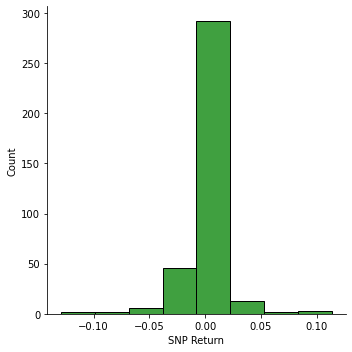

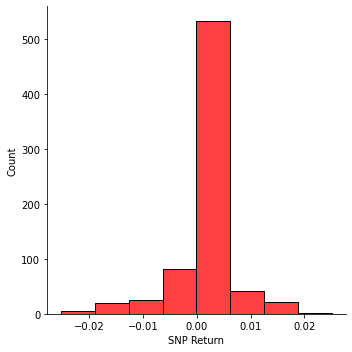

In [13]:
#seaborn for top performances pre COVID pre-crash
sns.displot(returns.loc['2020-01-01':'2020-12-31']['SNP Return'],color='green', bins=8)
#seaborn for top performances post COVID pre-crash
sns.displot(returns.loc['2021-01-01':'2022-12-31']['SNP Return'],color='red', bins=8)
#plt.show()
#lineplot of econo entiretime


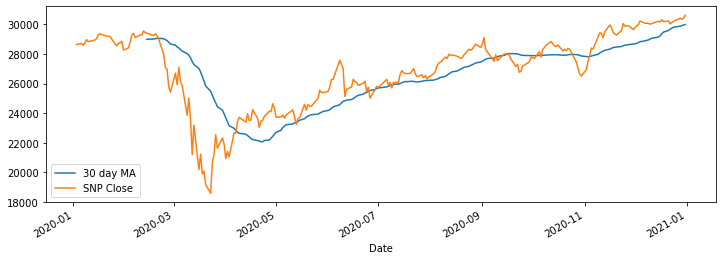

In [26]:
plt.figure(figsize=(12,4))
SNP['Close'].loc['2020-01-01':'2021-01-01'].rolling(window=30).mean().plot(label='30 day MA')
SNP['Close'].loc['2020-01-01':'2021-01-01'].plot(label='SNP Close')
plt.legend()

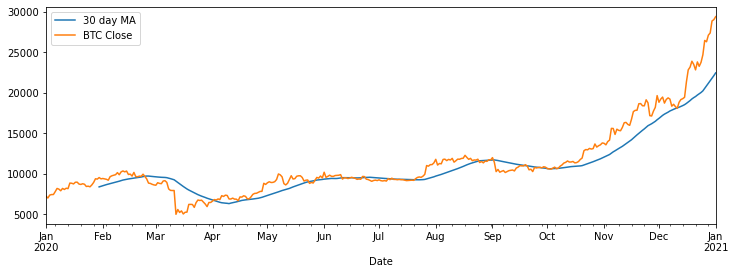

In [27]:
#plt.show()
#moving-averages for BTC pre and post the crash

plt.figure(figsize=(12,4))
BTC['Close'].loc['2020-01-01':'2021-01-01'].rolling(window=30).mean().plot(label='30 day MA')
BTC['Close'].loc['2020-01-01':'2021-01-01'].plot(label='BTC Close')
plt.legend()



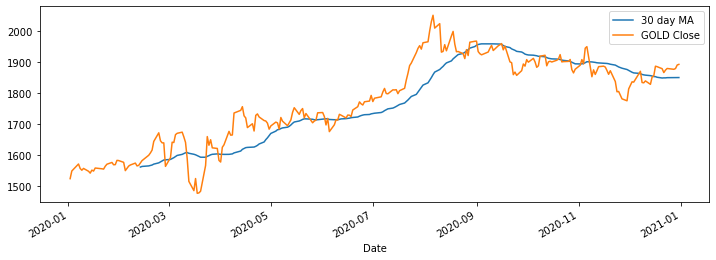

In [28]:
plt.figure(figsize=(12,4))
GOLD['Close'].loc['2020-01-01':'2021-01-01'].rolling(window=30).mean().plot(label='30 day MA')
GOLD['Close'].loc['2020-01-01':'2021-01-01'].plot(label='GOLD Close')
plt.legend()


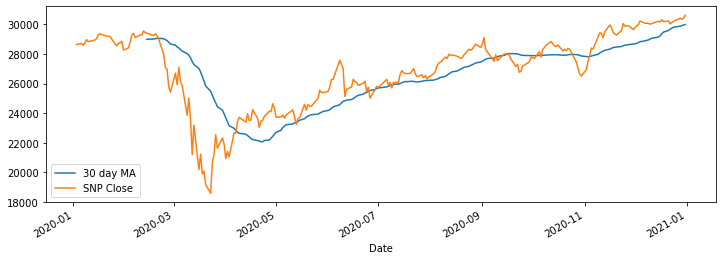

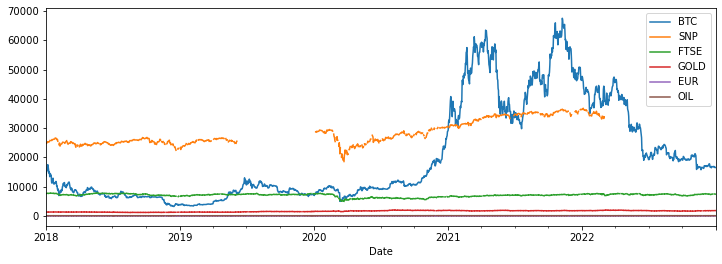

In [25]:
#plt.show()
#moving-averages for all economies/assets
for tick in tickers:
    eco_price[tick]['Close'].plot(label=tick, figsize=(12,4))
plt.legend()


<AxesSubplot:xlabel='Econ Ticker', ylabel='Econ Ticker'>

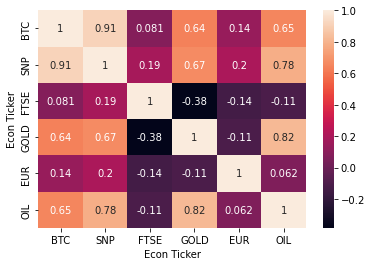

In [33]:
sns.heatmap(eco_price.xs(key='Close', axis=1, level = 'Stock Info').corr(),annot=True)

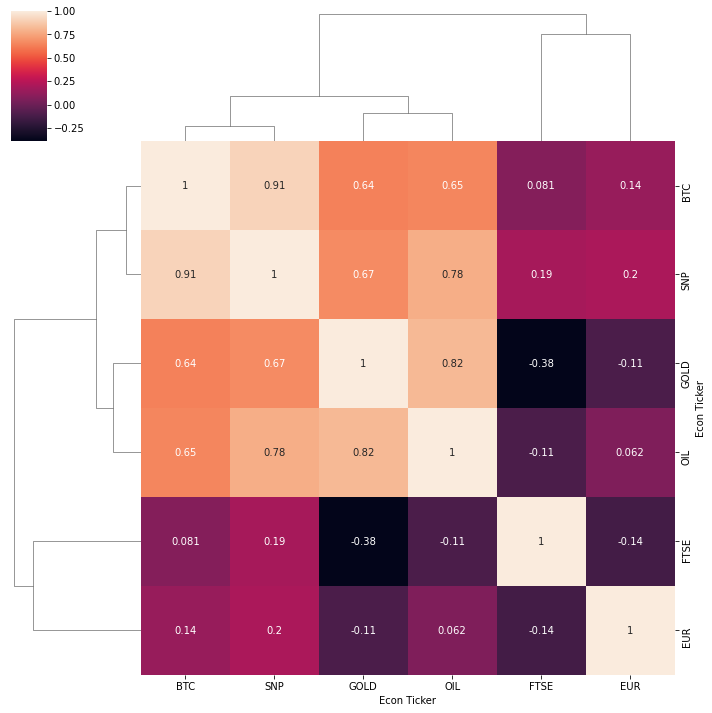

In [34]:
sns.clustermap(eco_price.xs(key='Close', axis=1, level = 'Stock Info').corr(),annot=True)